In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

In [2]:
df = pd.read_csv(r"H:\Nasa Space Apps 2025\data\cleaned_data.csv")
df.head()

,kepid,kepoi_name,koi_disposition,koi_pdisposition,koi_score,koi_period,koi_duration,koi_depth,koi_time0bk,koi_prad,...,koi_period_err1,koi_period_err2,koi_duration_err1,koi_duration_err2,koi_depth_err1,koi_depth_err2,koi_prad_err1,koi_prad_err2,koi_steff_err1,koi_steff_err2
0,10797460,K00752.01,CONFIRMED,CANDIDATE,1.000,9.488036,2.95750,615.8,170.538750,2.26,...,2.775000e-05,-2.775000e-05,0.08190,-0.08190,19.5,-19.5,0.26,-0.15,81.0,-81.0
1,10797460,K00752.02,CONFIRMED,CANDIDATE,0.969,54.418383,4.50700,874.8,162.513840,2.83,...,2.479000e-04,-2.479000e-04,0.11600,-0.11600,35.5,-35.5,0.32,-0.19,81.0,-81.0
2,10811496,K00753.01,CANDIDATE,CANDIDATE,0.000,19.899140,1.78220,10829.0,175.850252,14.60,...,1.494000e-05,-1.494000e-05,0.03410,-0.03410,171.0,-171.0,3.92,-1.31,158.0,-176.0
3,10848459,K00754.01,FALSE POSITIVE,FALSE POSITIVE,0.000,1.736952,2.40641,8079.2,170.307565,33.46,...,2.630000e-07,-2.630000e-07,0.00537,-0.00537,12.8,-12.8,8.50,-2.83,157.0,-174.0
4,10854555,K00755.01,CONFIRMED,CANDIDATE,1.000,2.525592,1.65450,603.3,171.595550,2.75,...,3.761000e-06,-3.761000e-06,0.04200,-0.04200,16.9,-16.9,0.88,-0.35,169.0,-211.0


C:\Users\CRIZMA\AppData\Local\Temp\ipykernel_14544\3822568959.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=disposition_counts.index, y=disposition_counts.values, palette='viridis')


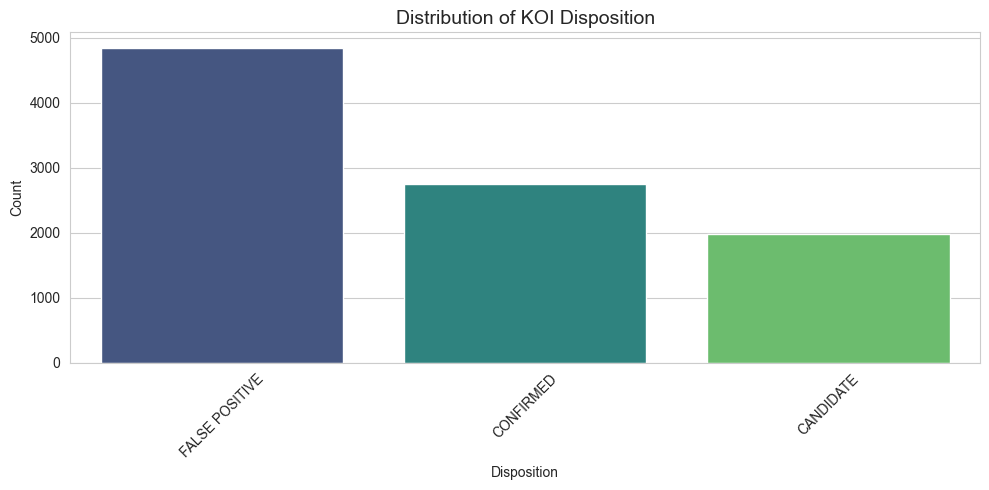

In [3]:
plt.figure(figsize=(10, 5))
disposition_counts = df['koi_disposition'].value_counts()
sns.barplot(x=disposition_counts.index, y=disposition_counts.values, palette='viridis')
plt.title('Distribution of KOI Disposition', fontsize=14)
plt.xlabel('Disposition')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [4]:
print("Class Distribution:")
print(df['koi_disposition'].value_counts())
print("\nClass Percentages:")
print(df['koi_disposition'].value_counts(normalize=True) * 100)

Class Distribution:
koi_disposition
FALSE POSITIVE    4839
CONFIRMED         2746
CANDIDATE         1979
Name: count, dtype: int64

Class Percentages:
koi_disposition
FALSE POSITIVE    50.595985
CONFIRMED         28.711836
CANDIDATE         20.692179
Name: proportion, dtype: float64


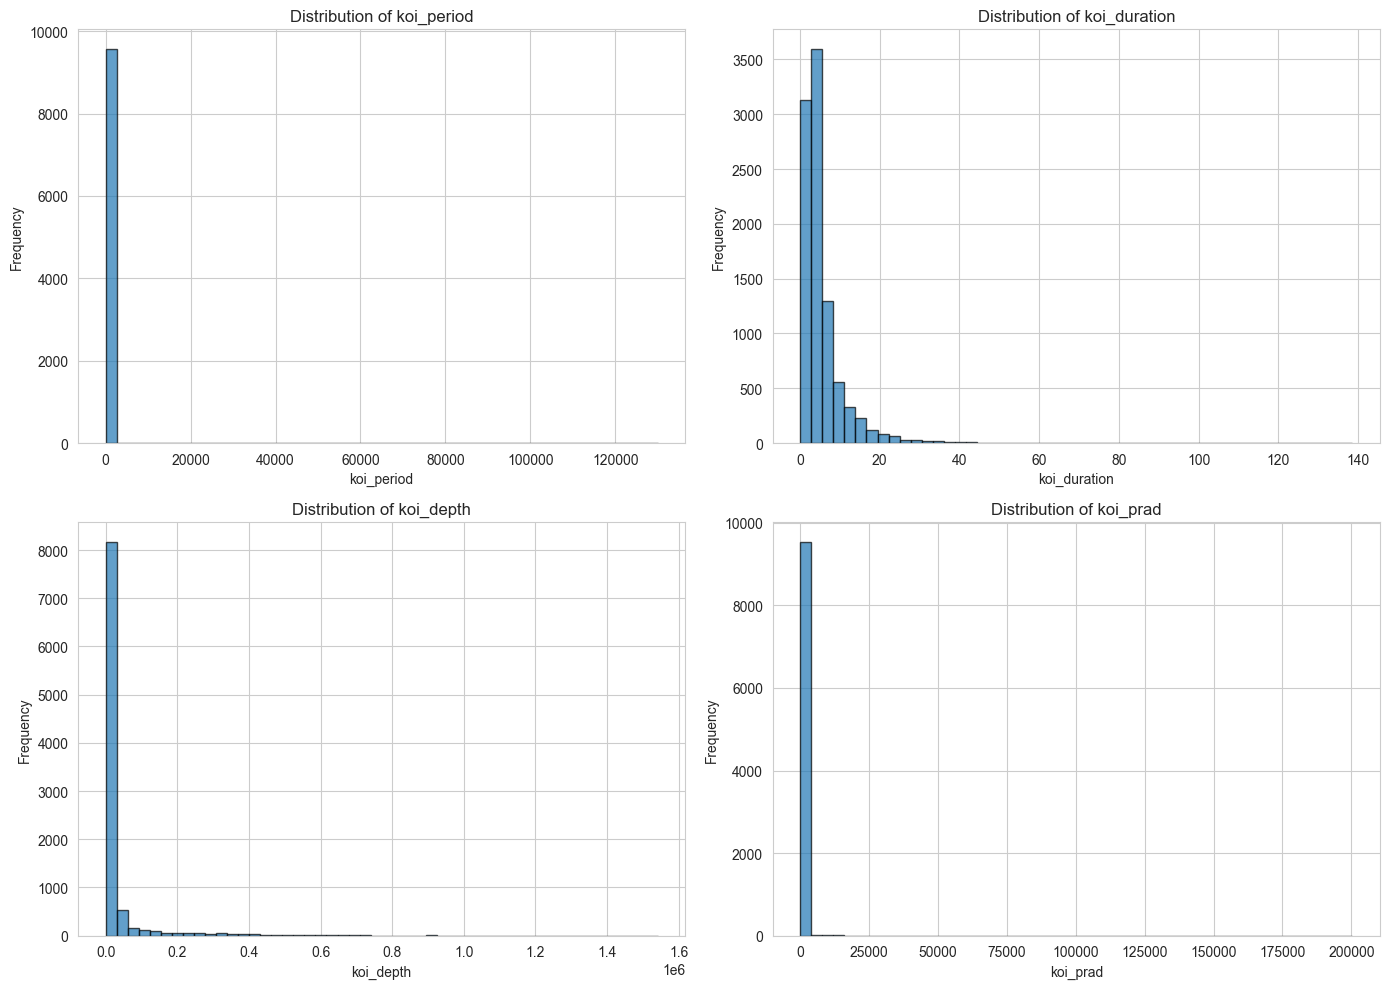

In [5]:
transit_params = ['koi_period', 'koi_duration', 'koi_depth', 'koi_prad']

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for idx, col in enumerate(transit_params):
    axes[idx].hist(df[col].dropna(), bins=50, edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'Distribution of {col}', fontsize=12)
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frequency')
    
plt.tight_layout()
plt.show()

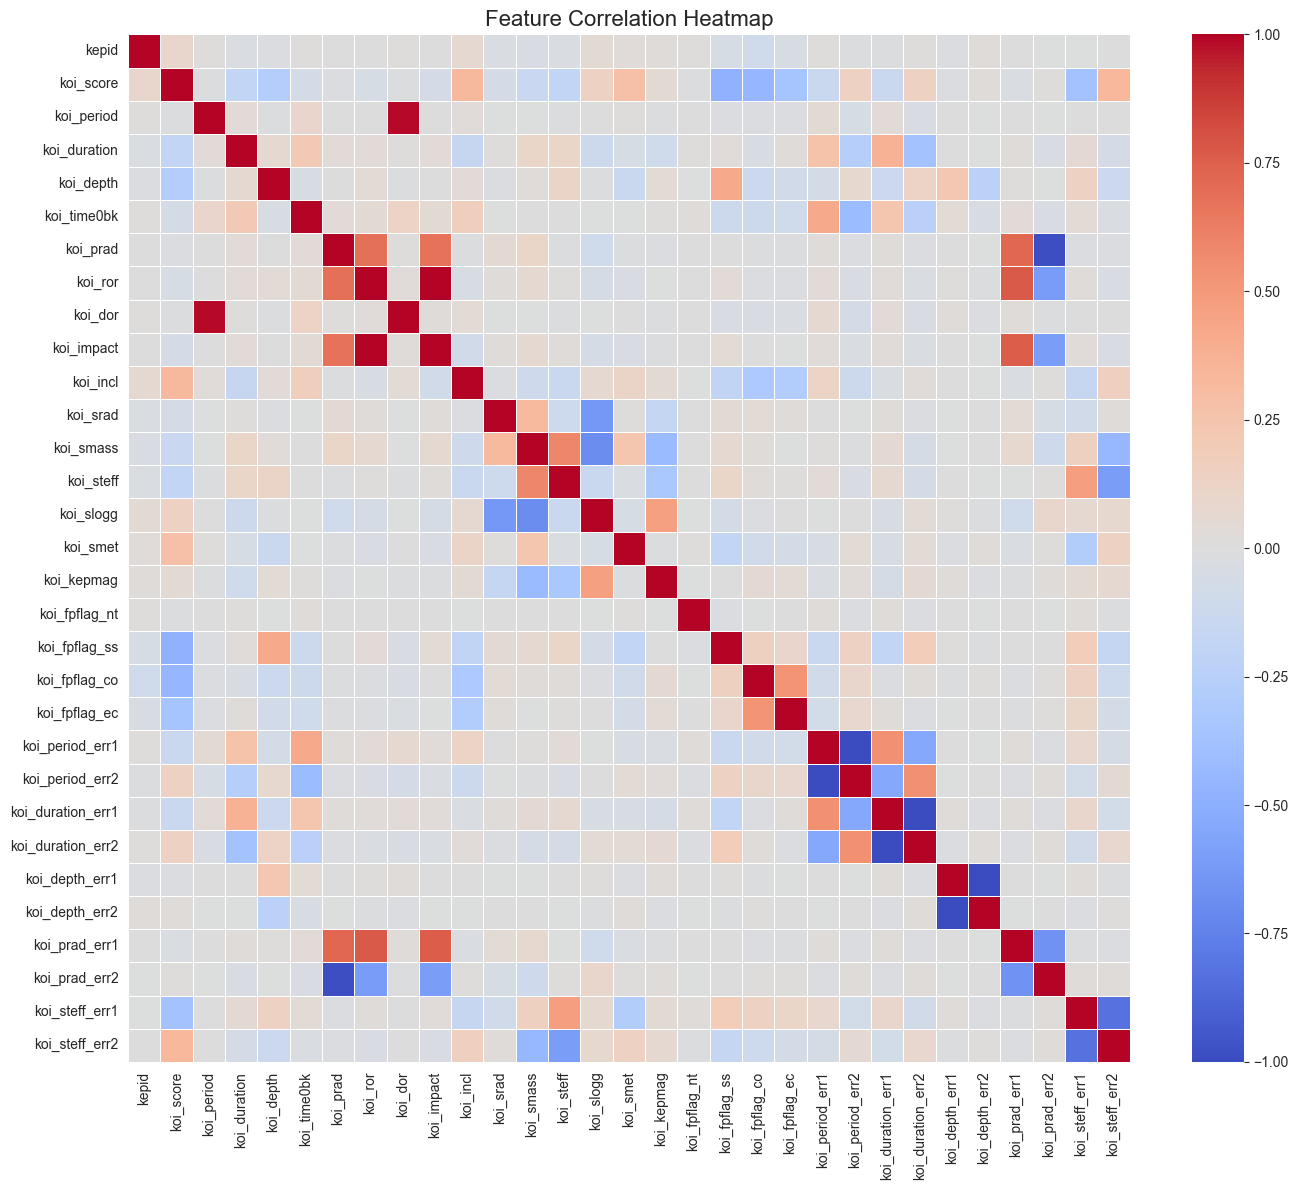

In [6]:
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()

# Correlation matrix
plt.figure(figsize=(14, 12))
correlation_matrix = df[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', 
            center=0, linewidths=0.5)
plt.title('Feature Correlation Heatmap', fontsize=16)
plt.tight_layout()
plt.show()

In [7]:
print("Top correlations with koi_depth:")
print(correlation_matrix['koi_depth'].sort_values(ascending=False).head(10))

Top correlations with koi_depth:
koi_depth            1.000000
koi_fpflag_ss        0.417684
koi_depth_err1       0.228150
koi_steff_err1       0.143900
koi_duration_err2    0.131502
koi_steff            0.112277
koi_period_err2      0.070845
koi_duration         0.064184
koi_ror              0.043965
koi_kepmag           0.041242
Name: koi_depth, dtype: float64


C:\Users\CRIZMA\AppData\Local\Temp\ipykernel_14544\838960001.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='koi_disposition', y=feature, ax=axes[idx], palette='Set2')
C:\Users\CRIZMA\AppData\Local\Temp\ipykernel_14544\838960001.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='koi_disposition', y=feature, ax=axes[idx], palette='Set2')
C:\Users\CRIZMA\AppData\Local\Temp\ipykernel_14544\838960001.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='koi_disposition', y=feature, ax=axes[idx], palette='Se

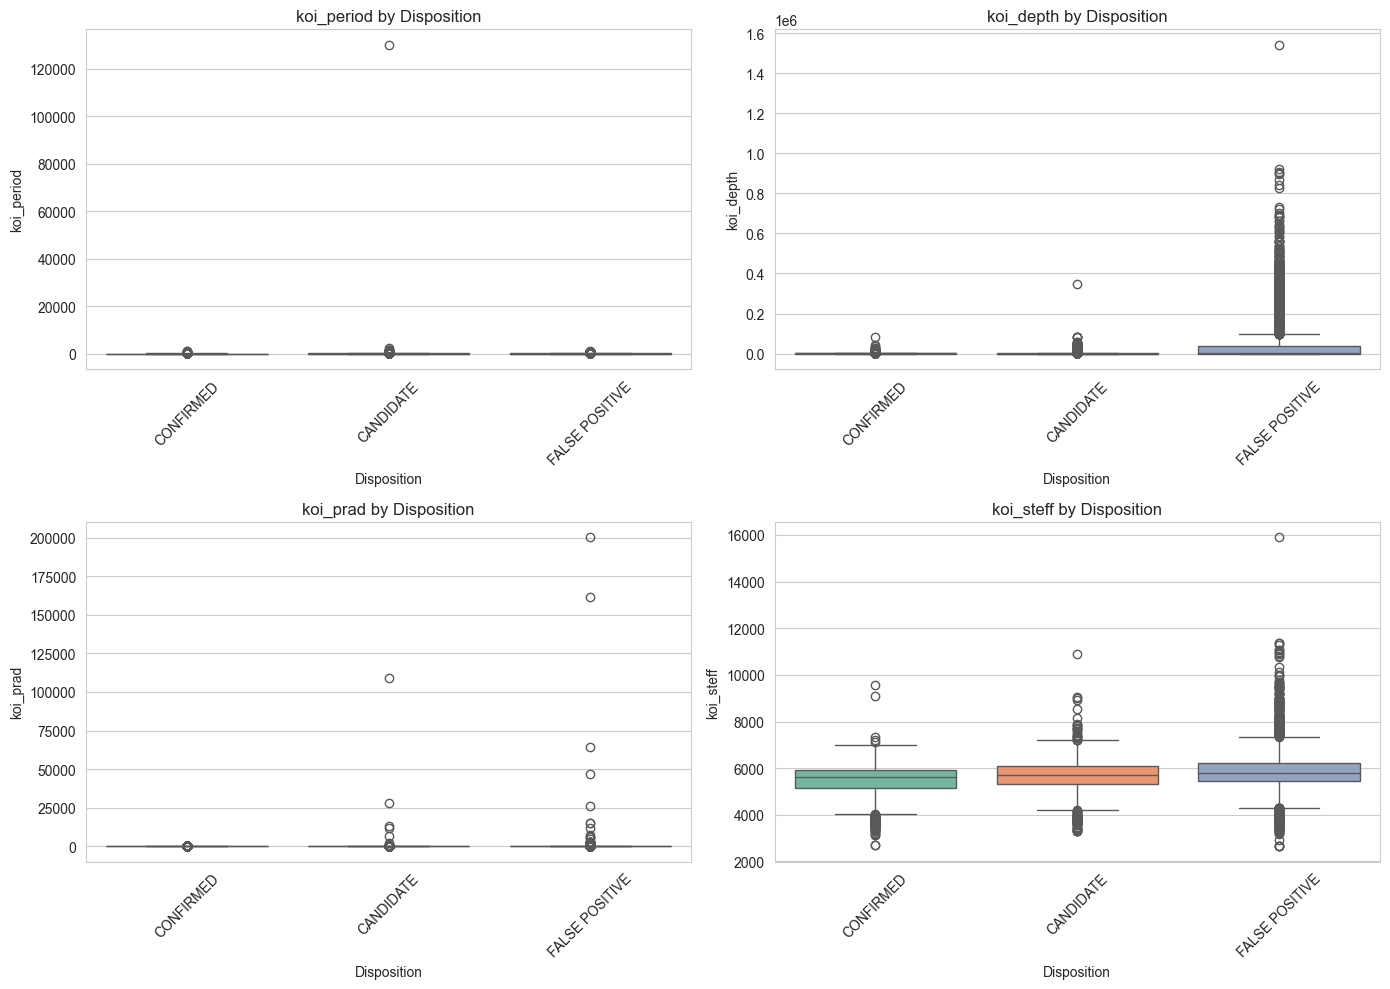

In [8]:
features_to_plot = ['koi_period', 'koi_depth', 'koi_prad', 'koi_steff']

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for idx, feature in enumerate(features_to_plot):
    sns.boxplot(data=df, x='koi_disposition', y=feature, ax=axes[idx], palette='Set2')
    axes[idx].set_title(f'{feature} by Disposition', fontsize=12)
    axes[idx].set_xlabel('Disposition')
    axes[idx].set_ylabel(feature)
    axes[idx].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [9]:
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return len(outliers), (lower_bound, upper_bound)

print("\n=== Outlier Analysis ===")
for col in ['koi_period', 'koi_depth', 'koi_prad', 'koi_duration']:
    n_outliers, bounds = detect_outliers(df, col)
    print(f"{col}: {n_outliers} outliers (bounds: {bounds[0]:.2f} to {bounds[1]:.2f})")


=== Outlier Analysis ===
koi_period: 1567 outliers (bounds: -54.24 to 97.69)
koi_depth: 2006 outliers (bounds: -2577.00 to 4739.80)
koi_prad: 941 outliers (bounds: -28.99 to 52.14)
koi_duration: 869 outliers (bounds: -3.32 to 12.03)


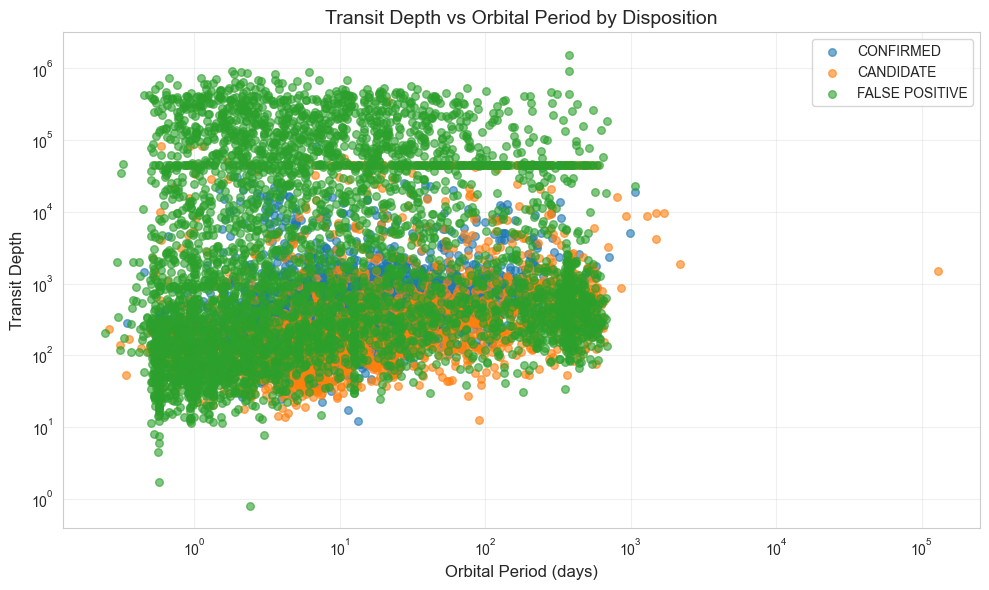

In [10]:
plt.figure(figsize=(10, 6))
for disposition in df['koi_disposition'].unique():
    subset = df[df['koi_disposition'] == disposition]
    plt.scatter(subset['koi_period'], subset['koi_depth'], 
                label=disposition, alpha=0.6, s=30)

plt.xlabel('Orbital Period (days)', fontsize=12)
plt.ylabel('Transit Depth', fontsize=12)
plt.title('Transit Depth vs Orbital Period by Disposition', fontsize=14)
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

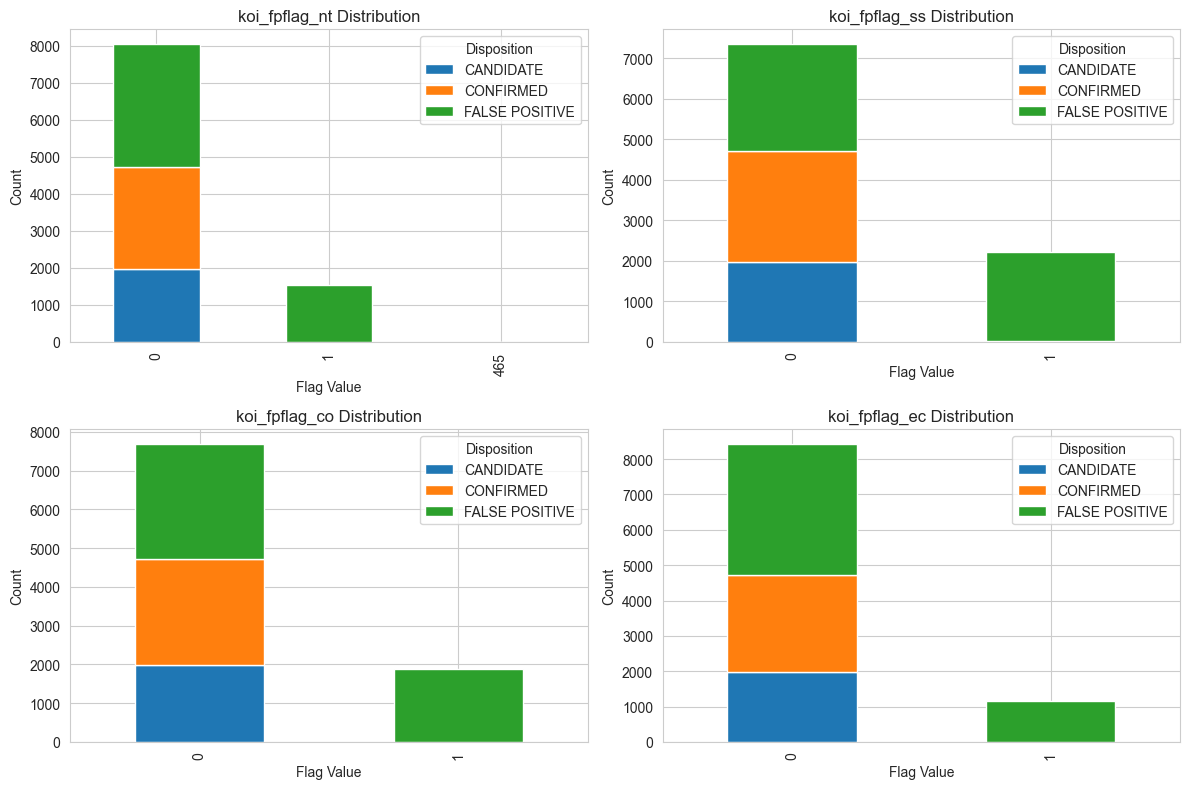

In [11]:
fp_flags = ['koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec']

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

for idx, flag in enumerate(fp_flags):
    flag_counts = df.groupby([flag, 'koi_disposition']).size().unstack(fill_value=0)
    flag_counts.plot(kind='bar', ax=axes[idx], stacked=True)
    axes[idx].set_title(f'{flag} Distribution', fontsize=12)
    axes[idx].set_xlabel('Flag Value')
    axes[idx].set_ylabel('Count')
    axes[idx].legend(title='Disposition')

plt.tight_layout()
plt.show()


In [12]:
print(df.groupby('koi_disposition')[['koi_period', 'koi_depth', 'koi_prad', 'koi_score']].mean())

                 koi_period     koi_depth    koi_prad  koi_score
koi_disposition                                                 
CANDIDATE        167.697021   3695.428247   94.841811   0.657622
CONFIRMED         27.910112   1097.661577    2.883726   0.958154
FALSE POSITIVE    65.138933  46087.117183  158.130091   0.076946
